<a href="https://colab.research.google.com/github/guipatriota/leitura-e-grava-o-de-arquivos-em-Python/blob/main/Aula_Pr%C3%A1tica_4_Linguagem_de_Programa%C3%A7%C3%A3o_Arquivos_e_Salvamentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula Prática 4 - Arquivos e salvamentos
Nesta aula veremos algumas formas de importação de arquivos para uso com o Python e como realizamos o salvamento destes dados.

É importante sabermos que sempre é possível realizarmos a leitura de qualquer tipo de arquivo de forma manual (criar o seu próprio parser para o arquivo), porém o uso de bibliotecas com parsers prontos para cada tipo de arquivo facilita bastante nosso trabalho.
Nest aula veremos como realizar a leitura e a gravação de dados nos seguintes formatos:
  * TEMA 1 – XML E JSON
  * TEMA 2 – CSV E PARQUET
  * TEMA 3 – SQLITE
  * TEMA 4 – PERSISTINDO AQUI (Salvamento local e Pickle)
  * TEMA 5 – PERSISTINDO LÁ (REST)




## Preparo do ambiente de desenvolvimento

Antes de iniciarmos as análises é necessário a importação dos arquivos que usaremos nos exemplos.

Para esta importação, podemos fazer:
- Upload manual de todos eles para este notebook do Google Colab;
- Conexão com nosso Google Drive pela interface visual de arquivos do Google Colab (menu da esquerda);
- Conexão com nosso Google Drive em forma de comandos nas células deste notebook.

As próximas células conterão as linhas de programação necessárias para realizarmos a conexão em linha. Para tanto, você deverá conter todos os arquivos em seu Google Drive, preferencialmente em uma pasta na raiz de seu drive com o seguinte nome:

AULA_PRÁTICA_4-PYTHON_LEITURA_E_GRAVAÇÃO

Independente do método que você escolha, o uso da conexão com o Google Drive é a que permite importação mais rápida dos arquivos.

In [ ]:
# Conexão com Google Drive:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Cópia dos arquivos necessários da pasta AULA_PRÁTICA_4-PYTHON_LEITURA_E_GRAVAÇÃO (5 a 20 segundos de execução. Depende da velocidade da conexão).
# Caso você tenha optado por um local ou nome diferente da pasta, faça as devidas alterações.
!cp /content/drive/MyDrive/AULA_PRÁTICA_4-PYTHON_LEITURA_E_GRAVAÇÃO/*.* /content

Após a importação dos arquivos, podemos realizar a manipulação dos arquivos.

De forma geral, podemos realizar a abertura, leitura, escrita e fechamento de qualquer arquivo em formato de texto simples com os comandos python abaixo:
- arquivo = open(nome_do_arquivo, tipo_de_abertura)
  - nome_do_arquivo deve ser uma string com o caminho e nome do seu arquivo
  - tipo_de_abertura pode ser:
    - 'r'  para ler (erro se arquivo não existir)
    - 'r+' para ler (erro se arquivo não existir) e escrever (no início do arquivo)
    - 'w'  cria novo arquivo ou substitui existente (apaga conteúdo antigo) e escreve (no início do arquivo)
    - 'w+' cria novo arquivo ou substitui existente (apaga conteúdo antigo) e lê e escreve (no início do arquivo)
    - 'a'  cria novo arquivo ou abre existente e escreve (no fim do arquivo)
    - 'a+' cria novo arquivo ou abre existente e lê e escreve (no fim do arquivo)
- arquivo.write(string_qualquer)
- arquivo.close()

In [ ]:
arquivo = open('exemplo_simples.txt', 'w+')
arquivo.write('Olá mundo\nEsta é a segunda linha\nEsta é a terceira linha\n') # 60 caracteres gravados
arquivo.seek(0)
conteudo = arquivo.read()
print(conteudo)

Olá mundo
Esta é a segunda linha
Esta é a terceira linha



In [ ]:
# .tell() mostra a posição atual do cursor.
arquivo.tell()

60

Após a abertura e manipulação de um arquivo, devemos fechá-lo, para que o arquivo seja liberado para outros programas:

In [ ]:
arquivo.close()

Aqui no Google Colab, se quisermos abrir um arquivo pela linha de comando do linux, usamos o acesso ! para usar comandos linux e o comando cat para ver o conteúdo de um arquivo:

In [ ]:
!cat exemplo_simples.txt

Olá mundo
Esta é a segunda linha
Esta é a terceira linha


Podemos usar o gerenciamento de contexto com o comando ```with``` para abrir e manipular arquivos em Python.

Esta estratégia fecha o arquivo automaticamente quando o contexto se encerra (saída do comando ```with```)

In [ ]:
with open('exemplo_simples.txt', 'a+') as arquivo:
   arquivo.write('Quarta linha é feita com uso do gerenciamentode contexto\n'+\
                 'Esta é a quinta linha e foi feita da mesma forma\n')

In [ ]:
!cat exemplo_simples.txt

Olá mundo
Esta é a segunda linha
Esta é a terceira linha
Quarta linha é feita com uso do gerenciamentode contexto
Esta é a quinta linha e foi feita da mesma forma


Se tentarmos encontrar a posição atual do cursor no arquivo, veremos um erro nos informando que ele está fechado:

In [ ]:
# .tell() mostra a posição atual do cursor.
arquivo.tell()

ValueError: ignored

Com esta forma simples de abertura é possível manipular diversos tipos de arquivos, porém teríamos que criar as funções de parseamento de cada tipo de texto e formato de arquivo e isso já foi feito e está disponível em algumas bibliotecas.

Nesta aula vamos utilizar duas bibliotecas principais:
- PANDAS
  - O Pandas é uma das bibliotecas mais usadas para manipulação de dados e possui diversas funcionalidades para importação e salvamento de arquivos em diversos formatos. Seu ponto fraco é o aumento do tempo de processamento quanto maior for o arquivo de dados. Se formos processar arquivos muito grantes (acima de 4GB), não é aconselhável o uso do pandas.
- PYSPARK
  - O Spark é um framework para manipulação de grandes quantidades de dados e no Pyhton usamos o Pyspark para acessar suas funcionalidades. Seu principal objetivo é permitir o processamento de dados em várias máquinas ao mesmo tempo (processamento distribuído), porém aqui vamos utilizar principalemente a sua capacidade de realizar processamente preguiçoso (Lazy Processing). Com isso, os dados só vão para a memória RAM e são computados quando solicitamos visualização. Caso contrário, o Spark mantém apenas o mínimo em memória, permitindo manippulação de grandes quantidades de dados (Big Data).

### INICIALIZAÇÃO DO PANDAS
Importação da biblioteca que já vem instalada no Google Colab.

In [ ]:
# Importação do Pandas
import pandas as pd

### INICIALIZAÇÃO DO SPARK
- Atualização do linux do Google Colab
- Configuração das variáveis de ambiente para instalação do SPARK
- Instalação do SPARK e do FINDSPARK
- Importação da biblioteca FINDSPARK para localizar o SPARK instalado
- Importação do SPARK através do FINDSPARK

In [ ]:
# Configuração do ambiente e importação do pyspark.
# Podemos fazer de duas formas:
## !pip install pyspark
## from pyspark.sql import SparkSession
# ou
# Configurar o linux no qual este notebook está rodando. Esta última permite maior qunatidade de funcionalidades e é esta que usaremos.

# Update do linux desta instância do google colab (de 5 a 15 segundos de execução):
!sudo apt-get update

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [85.6 kB]
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:14 http://ppa.launchpad.net/

In [ ]:
# Descoberta da pasta do JAVA deste linux:
JAVA_FOLDER = !readlink -f /usr/bin/java | sed "s:bin/java::"

# Configuração de variáveis de ambiente:
import os
os.environ["JAVA_HOME"] = JAVA_FOLDER[0]
os.environ["PATH"] += os.pathsep + os.environ["JAVA_HOME"] + "/bin"

os.environ["SPARK_HOME"] = "/usr/local/spark"
os.environ["PATH"] += os.pathsep + os.environ["SPARK_HOME"] + "/bin"

# Opções para uso do Spark com XML:
os.environ['PYSPARK_SUBMIT_ARGS'] = "--packages com.databricks:spark-xml_2.12:0.15.0 pyspark-shell"

In [ ]:
# Instalação do SPARK (40 a 120 segundos de execução, depende da velocidade da conexão):
!wget -q -O spark.tgz https://archive.apache.org/dist/spark/spark-3.3.0/spark-3.3.0-bin-hadoop3.tgz
!tar xf spark.tgz
!mv ./spark-* /usr/local/spark
!pip install -q findspark
!rm spark.tgz

In [ ]:
# Inicializando o Spark
import findspark
findspark.init(os.environ["SPARK_HOME"])

In [ ]:
# Criação do objeto SparkSession para uso do pyspark.sql (15 a 30 segundos de execução):
from pyspark.sql import SparkSession
appName = "PySpark Aula 4"
master = "local[*]"

spark = SparkSession.builder\
    .appName(appName)\
    .master(master)\
    .getOrCreate()

## Leitura de arquivos XML e JSON com PANDAS



Com o PANDAS, para importar um arquivo e já formatá-lo como um dataframe, usamos os métodos de leitura:
- pandas.read_xml
- pandas.read_json
- pandas.read_csv
- pandas.read_parquet
- pandas.read_sql
- pandas.read_excel
- pandas.read_html
- pandas.read_feather
- pandas.read_pickle
- pandas.read_clipboard
- ...

Da mesma forma, podemos salvar os dados de um dataframe em um arquivo, usando os métodos de escrita:
- pandas.to_xml
- pandas.to_json
- pandas.to_csv
- pandas.to_parquet
- pandas.to_sql
- pandas.to_pickle
- pandas.to_excel
- pandas.to_clipboard
- ...

<font color="red">**IMPORTANTE:** Como importamos o pandas e o renomeamos para pd, vamos substituir a palavra pandas por pd em nosso código.</font>

### XML com PANDAS

Realizar a leitura de um arquivo XML muito grande com o pandas pode causar falha no Ambiente de Execução do Google Colab ou demorar muito mais do que com SPARK. Neste caso, ocorrerá uma falha de sessão após 7 minutos, por conta de uso de toda a memória RAM disponível neste notebook do Google Colab.

Análise do tamanho do arquivo:

In [ ]:
!ls -lh | grep Badges.xml | awk '{print "Arquivo: " $9 "\nTamanho: " $5"B"}'

Arquivo: Badges.xml
Tamanho: 1.1GB


Importação de arquivo muito grande com pandas:

In [ ]:
# Tentativa de importação de arquivo XML com mais de 1GB no Pandas. (7 minutos de execução, em média, até o colab resetar)
# pddf_xml_grande = pd.read_xml('Badges.xml')

A figura abaixo mostra o erro que ocorre.
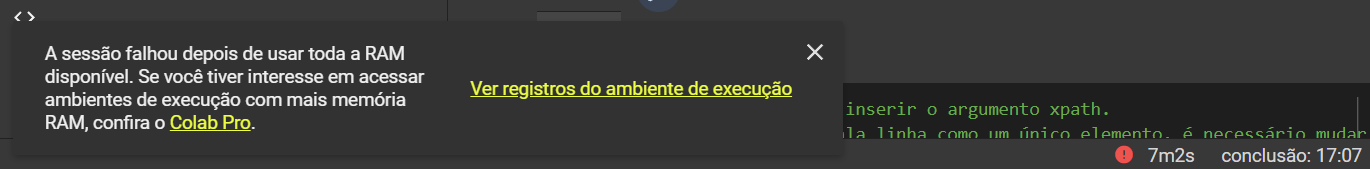

Para testarmos a importação de XML com PANDAS, vamos usar um arquivo com a mesma estrutura, porém menor:

In [ ]:
!ls -lh | grep Badges-small.xml | awk '{print "Arquivo: " $9 "\nTamanho: " $5"B"}'

!echo ""
!echo "Conteúdo do arquivo Badges-small.xml:"
!echo ""

!cat Badges-small.xml

Arquivo: Badges-small.xml
Tamanho: 622B

Conteúdo do arquivo Badges-small.xml:

<?xml version="1.0" encoding="utf-8"?>
<Root>
	<badges>
		<row Id="82946" UserId="3718" Name="Teacher" Date="2008-09-15T08:55:03.923" Class="3" TagBased="False" />
		<row Id="82947" UserId="994" Name="Teacher" Date="2008-09-15T08:55:03.957" Class="3" TagBased="False" />
		<row Id="82949" UserId="3893" Name="Teacher" Date="2008-09-15T08:55:03.957" Class="3" TagBased="False" />
		<row Id="82950" UserId="4591" Name="Teacher" Date="2008-09-15T08:55:03.957" Class="3" TagBased="False" />
		<row Id="82951" UserId="5196" Name="Teacher" Date="2008-09-15T08:55:03.957" Class="3" TagBased="False" />
	</badges>
</Root>

In [ ]:
# Importação sem opções de configuração
pddf_xml = pd.read_xml('Badges-small.xml')

Dados importados incorretamente, pois cada linha retornou um único elemento `<row>`

In [ ]:
pddf_xml.head()

,row
0,NaN


Para corrigir, é necessário inserir o argumento xpath.

Como o arquivo XML possui cala linha como um único elemento, é necessário mudar o xpath de "./*" (padrão) para ".//row":

In [ ]:
pddf_xml = pd.read_xml('Badges-small.xml', xpath=".//row")

In [ ]:
pddf_xml.head()

,Id,UserId,Name,Date,Class,TagBased
0,82946,3718,Teacher,2008-09-15T08:55:03.923,3,False
1,82947,994,Teacher,2008-09-15T08:55:03.957,3,False
2,82949,3893,Teacher,2008-09-15T08:55:03.957,3,False
3,82950,4591,Teacher,2008-09-15T08:55:03.957,3,False
4,82951,5196,Teacher,2008-09-15T08:55:03.957,3,False


#### Persistindo aqui: XML com PANDAS
Para salvar dados de um pandas dataframe em um formato XML, devemos informar qual será a estrutura do arquivo:

In [ ]:
# Método to_df() com todas as opções padrão:
string_xml = pddf_xml.to_xml(
                       path_or_buffer=None, 
                       index=True, 
                       root_name='data', 
                       row_name='row', 
                       na_rep=None, 
                       attr_cols=None, 
                       elem_cols=None, 
                       namespaces=None, 
                       prefix=None, 
                       encoding='utf-8', 
                       xml_declaration=True, 
                       pretty_print=True, 
                       parser='lxml', 
                       stylesheet=None, 
                       compression='infer', 
                       storage_options=None)
print(string_xml)

<?xml version='1.0' encoding='utf-8'?>
<data>
  <row>
    <index>0</index>
    <Id>82946</Id>
    <UserId>3718</UserId>
    <Name>Teacher</Name>
    <Date>2008-09-15T08:55:03.923</Date>
    <Class>3</Class>
    <TagBased>False</TagBased>
  </row>
  <row>
    <index>1</index>
    <Id>82947</Id>
    <UserId>994</UserId>
    <Name>Teacher</Name>
    <Date>2008-09-15T08:55:03.957</Date>
    <Class>3</Class>
    <TagBased>False</TagBased>
  </row>
  <row>
    <index>2</index>
    <Id>82949</Id>
    <UserId>3893</UserId>
    <Name>Teacher</Name>
    <Date>2008-09-15T08:55:03.957</Date>
    <Class>3</Class>
    <TagBased>False</TagBased>
  </row>
  <row>
    <index>3</index>
    <Id>82950</Id>
    <UserId>4591</UserId>
    <Name>Teacher</Name>
    <Date>2008-09-15T08:55:03.957</Date>
    <Class>3</Class>
    <TagBased>False</TagBased>
  </row>
  <row>
    <index>4</index>
    <Id>82951</Id>
    <UserId>5196</UserId>
    <Name>Teacher</Name>
    <Date>2008-09-15T08:55:03.957</Date>
    <Class>

Usar todos os argumentos como padrão é o mesmo que não colocar nenhum argumento:

In [ ]:
string_xml = pddf_xml.to_xml()
print(string_xml)

<?xml version='1.0' encoding='utf-8'?>
<data>
  <row>
    <index>0</index>
    <Id>82946</Id>
    <UserId>3718</UserId>
    <Name>Teacher</Name>
    <Date>2008-09-15T08:55:03.923</Date>
    <Class>3</Class>
    <TagBased>False</TagBased>
  </row>
  <row>
    <index>1</index>
    <Id>82947</Id>
    <UserId>994</UserId>
    <Name>Teacher</Name>
    <Date>2008-09-15T08:55:03.957</Date>
    <Class>3</Class>
    <TagBased>False</TagBased>
  </row>
  <row>
    <index>2</index>
    <Id>82949</Id>
    <UserId>3893</UserId>
    <Name>Teacher</Name>
    <Date>2008-09-15T08:55:03.957</Date>
    <Class>3</Class>
    <TagBased>False</TagBased>
  </row>
  <row>
    <index>3</index>
    <Id>82950</Id>
    <UserId>4591</UserId>
    <Name>Teacher</Name>
    <Date>2008-09-15T08:55:03.957</Date>
    <Class>3</Class>
    <TagBased>False</TagBased>
  </row>
  <row>
    <index>4</index>
    <Id>82951</Id>
    <UserId>5196</UserId>
    <Name>Teacher</Name>
    <Date>2008-09-15T08:55:03.957</Date>
    <Class>

Caso seja interessante salvarmos o arquivo neste formato mesmo, fazemos:

In [ ]:
pddf_xml.to_xml("formato1_de_xml.xml")

Perceba que a formatação final está correta, porém diferente da originalmente importada e com a adição da informação do index do dataframe pandas.

**Original:**
```xml
<?xml version="1.0" encoding="utf-8"?>
<Root>
  <badges>
    <row Id="82946" UserId="3718" Name="Teacher" Date="2008-09-15T08:55:03.923" Class="3" TagBased="False"/>
    <row Id="82947" UserId="994" Name="Teacher" Date="2008-09-15T08:55:03.957" Class="3" TagBased="False"/>
    <row Id="82949" UserId="3893" Name="Teacher" Date="2008-09-15T08:55:03.957" Class="3" TagBased="False"/>
    <row Id="82950" UserId="4591" Name="Teacher" Date="2008-09-15T08:55:03.957" Class="3" TagBased="False"/>
    <row Id="82951" UserId="5196" Name="Teacher" Date="2008-09-15T08:55:03.957" Class="3" TagBased="False"/>
  </badges>
</Root>
```

In [ ]:
!cat formato1_de_xml.xml

<?xml version='1.0' encoding='utf-8'?>
<data>
  <row>
    <index>0</index>
    <Id>82946</Id>
    <UserId>3718</UserId>
    <Name>Teacher</Name>
    <Date>2008-09-15T08:55:03.923</Date>
    <Class>3</Class>
    <TagBased>False</TagBased>
  </row>
  <row>
    <index>1</index>
    <Id>82947</Id>
    <UserId>994</UserId>
    <Name>Teacher</Name>
    <Date>2008-09-15T08:55:03.957</Date>
    <Class>3</Class>
    <TagBased>False</TagBased>
  </row>
  <row>
    <index>2</index>
    <Id>82949</Id>
    <UserId>3893</UserId>
    <Name>Teacher</Name>
    <Date>2008-09-15T08:55:03.957</Date>
    <Class>3</Class>
    <TagBased>False</TagBased>
  </row>
  <row>
    <index>3</index>
    <Id>82950</Id>
    <UserId>4591</UserId>
    <Name>Teacher</Name>
    <Date>2008-09-15T08:55:03.957</Date>
    <Class>3</Class>
    <TagBased>False</TagBased>
  </row>
  <row>
    <index>4</index>
    <Id>82951</Id>
    <UserId>5196</UserId>
    <Name>Teacher</Name>
    <Date>2008-09-15T08:55:03.957</Date>
    <Class>

Como o resultado XML não foi no mesmo formato do arquivo original, devemos realizar algumas alterações.

In [ ]:
# Lista as colunas do dataframe
list(pddf_xml.columns.values)

NameError: ignored

Para retirar os dados da coluna index do arquivo xml e organizá-los por ATRIBUTOS do ELEMENTO row, fazemos:

- attr_cols = list(df_xml.columns.values)
  - Para configurar os atributos com os mesmo nomes das colunas do dataframe.
- root_name = "Root"
  - Para configurar o nome do elemento raiz como "Root"
- row_name = "row"
  - Para configurar o nome do elemento de linha como "row"
- index = False
  - Para que o arquivo xml não receba a coluna index criada automaticamento na criação do dataframe


In [ ]:
pddf_xml.to_xml("formato2_de_xml.xml", attr_cols=list(pddf_xml.columns.values), root_name="Root", row_name="row", index=False)
!cat formato2_de_xml.xml

<?xml version='1.0' encoding='utf-8'?>
<Root>
  <row Id="82946" UserId="3718" Name="Teacher" Date="2008-09-15T08:55:03.923" Class="3" TagBased="False"/>
  <row Id="82947" UserId="994" Name="Teacher" Date="2008-09-15T08:55:03.957" Class="3" TagBased="False"/>
  <row Id="82949" UserId="3893" Name="Teacher" Date="2008-09-15T08:55:03.957" Class="3" TagBased="False"/>
  <row Id="82950" UserId="4591" Name="Teacher" Date="2008-09-15T08:55:03.957" Class="3" TagBased="False"/>
  <row Id="82951" UserId="5196" Name="Teacher" Date="2008-09-15T08:55:03.957" Class="3" TagBased="False"/>
</Root>


Como ainda não conseguimos um resultado como o original (falta o elemento **badges**) :

```xml
<?xml version="1.0" encoding="utf-8"?>
<Root>
  <badges>
    <row Id="82946" UserId="3718" Name="Teacher" Date="2008-09-15T08:55:03.923" Class="3" TagBased="False"/>
    <row Id="82947" UserId="994" Name="Teacher" Date="2008-09-15T08:55:03.957" Class="3" TagBased="False"/>
    <row Id="82949" UserId="3893" Name="Teacher" Date="2008-09-15T08:55:03.957" Class="3" TagBased="False"/>
    <row Id="82950" UserId="4591" Name="Teacher" Date="2008-09-15T08:55:03.957" Class="3" TagBased="False"/>
    <row Id="82951" UserId="5196" Name="Teacher" Date="2008-09-15T08:55:03.957" Class="3" TagBased="False"/>
  </badges>
</Root>
```
Deveremos usar um xsl:stylesheet para criarmos a formatação xml desejada:


In [ ]:
meu_estilo = \
'''<xsl:stylesheet version="1.0" xmlns:xsl="http://www.w3.org/1999/XSL/Transform">
      <xsl:output indent="yes" encoding="utf-8"/>
  
      <xsl:template match="data">
          <Root>
              <badges>
                  <xsl:apply-templates select="row"/>
              </badges>
          </Root>
      </xsl:template>

      <xsl:template match="row">
          <xsl:element name="row">
              <xsl:attribute name="Id"><xsl:value-of select="Id"/></xsl:attribute>
              <xsl:attribute name="UserId"><xsl:value-of select="UserId"/></xsl:attribute>
              <xsl:attribute name="Name"><xsl:value-of select="Name"/></xsl:attribute>
              <xsl:attribute name="Date"><xsl:value-of select="Date"/></xsl:attribute>
              <xsl:attribute name="Class"><xsl:value-of select="Class"/></xsl:attribute>
              <xsl:attribute name="TagBased"><xsl:value-of select="TagBased"/></xsl:attribute>
          </xsl:element>
      </xsl:template>
</xsl:stylesheet>'''

Como agora temos uma string com código xsl, não precisamos mais definir as colunas de atributos e nem os nomes de root e row.

In [ ]:
pddf_xml.to_xml("formato_final_de_xml.xml", index=False, stylesheet=meu_estilo)
!cat formato_final_de_xml.xml

<?xml version="1.0" encoding="utf-8"?>
<Root>
  <badges>
    <row Id="82946" UserId="3718" Name="Teacher" Date="2008-09-15T08:55:03.923" Class="3" TagBased="False"/>
    <row Id="82947" UserId="994" Name="Teacher" Date="2008-09-15T08:55:03.957" Class="3" TagBased="False"/>
    <row Id="82949" UserId="3893" Name="Teacher" Date="2008-09-15T08:55:03.957" Class="3" TagBased="False"/>
    <row Id="82950" UserId="4591" Name="Teacher" Date="2008-09-15T08:55:03.957" Class="3" TagBased="False"/>
    <row Id="82951" UserId="5196" Name="Teacher" Date="2008-09-15T08:55:03.957" Class="3" TagBased="False"/>
  </badges>
</Root>


De fato, não precisamos de nenhum outro argumento além do nome do arquivo de destino e do nome do stylesheet, que pode ser um arquivo no formato xsl ou uma string com o código xsl, como neste exemplo.

In [ ]:
xml_str = pddf_xml.to_xml(stylesheet=meu_estilo)
print(xml_str)

<?xml version="1.0" encoding="utf-8"?>
<Root>
  <badges>
    <row Id="82946" UserId="3718" Name="Teacher" Date="2008-09-15T08:55:03.923" Class="3" TagBased="False"/>
    <row Id="82947" UserId="994" Name="Teacher" Date="2008-09-15T08:55:03.957" Class="3" TagBased="False"/>
    <row Id="82949" UserId="3893" Name="Teacher" Date="2008-09-15T08:55:03.957" Class="3" TagBased="False"/>
    <row Id="82950" UserId="4591" Name="Teacher" Date="2008-09-15T08:55:03.957" Class="3" TagBased="False"/>
    <row Id="82951" UserId="5196" Name="Teacher" Date="2008-09-15T08:55:03.957" Class="3" TagBased="False"/>
  </badges>
</Root>


O mesmo resultado utilizando um arquivo de estilo externo:

In [ ]:
xml_str = pddf_xml.to_xml(stylesheet="xml_format.xsl")
print(xml_str)

<?xml version="1.0" encoding="utf-8"?>
<Root>
  <badges>
    <row Id="82946" UserId="3718" Name="Teacher" Date="2008-09-15T08:55:03.923" Class="3" TagBased="False"/>
    <row Id="82947" UserId="994" Name="Teacher" Date="2008-09-15T08:55:03.957" Class="3" TagBased="False"/>
    <row Id="82949" UserId="3893" Name="Teacher" Date="2008-09-15T08:55:03.957" Class="3" TagBased="False"/>
    <row Id="82950" UserId="4591" Name="Teacher" Date="2008-09-15T08:55:03.957" Class="3" TagBased="False"/>
    <row Id="82951" UserId="5196" Name="Teacher" Date="2008-09-15T08:55:03.957" Class="3" TagBased="False"/>
  </badges>
</Root>


### JSON com PANDAS

O arquivo de exemplo é oriundo de uma coleta real de dados do Twitter com os filtros:
- Data entre 02/05/2022 e 08/05/2022
- Palavra chave: COVID.

Estrutura do nosso arquivo tweets_colected_May_2_to_8_2022_0515190324.json:

```json
{
    "data": [
        {
            "created_at": data e hora,
            "id": número,
            "text": texto do tweet
        },
        {
            "created_at": data e hora,
            "id": número,
            "text": texto do tweet
        }
    ],
    "meta": {
        "newest_id": número do primeiro tweet coletado,
        "oldest_id": número do último tweet coletado,
        "result_count": quantidade de tweets coletados
    }
}
```

In [ ]:
!cat tweets_colected_May_2_to_8_2022_0515190324.json

{
    "data": [
        {
            "created_at": "2021-05-08T21:00:00.000Z",
            "id": "1391135820371931137",
            "text": "#Cuba relatou mais de 1.000 novas infec\u00e7\u00f5es por #COVID-19 pelo terceiro dia consecutivo, com 1.060 casos, totalizando 112.714, afirmou o Minist\u00e9rio da Sa\u00fade P\u00fablica, acrescentando que houve outras sete mortes relatadas, elevando o total para 701.\n\nhttps://t.co/U05loLcfTH https://t.co/ahLZ9IrxOD"
        },
        {
            "created_at": "2021-05-08T20:30:00.000Z",
            "id": "1391128270721241089",
            "text": "A #Argentina relatou na quinta-feira 24.086 novas infec\u00e7\u00f5es por #COVID-19 e 399 mortes nas \u00faltimas 24 horas, elevando a contagem para 3.095.582 casos e 66.263 mortes.\n\nhttps://t.co/xZKWs97L3S https://t.co/WIZbblWMI7"
        },
        {
            "created_at": "2021-05-08T20:02:15.000Z",
            "id": "1391121287343452165",
            "text": "#COVID: #NUOVA #ONDATA di 

Primeira tentativa: Leitura do arquivo sem parâmetros:

In [ ]:
pddf_json = pd.read_json("tweets_colected_May_2_to_8_2022_0515190324.json")

ValueError: ignored

O erro ocorre pois nosso arquivo JSON possui dois índices com dois níveis cada. Um índice é o 'data' e dentro dele os dados dos tweets e o outro é o 'meta', com os dados gerais do arquivo.

Sendo assim, vamos tentar a importação com a orientação por índices, para vermos o que temos no arquivo:

In [ ]:
pddf_json = pd.read_json("tweets_colected_May_2_to_8_2022_0515190324.json", orient="index")
pddf_json.head()

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,129
data,"{'created_at': '2021-05-08T21:00:00.000Z', 'id...","{'created_at': '2021-05-08T20:30:00.000Z', 'id...","{'created_at': '2021-05-08T20:02:15.000Z', 'id...","{'created_at': '2021-05-08T19:45:52.000Z', 'id...","{'created_at': '2021-05-08T18:30:00.000Z', 'id...","{'created_at': '2021-05-08T17:53:52.000Z', 'id...","{'created_at': '2021-05-08T17:25:00.000Z', 'id...","{'created_at': '2021-05-08T15:39:14.000Z', 'id...","{'created_at': '2021-05-08T14:53:04.000Z', 'id...","{'created_at': '2021-05-08T14:00:00.000Z', 'id...",...,"{'created_at': '2021-05-02T20:22:16.000Z', 'id...","{'created_at': '2021-05-02T19:32:16.000Z', 'id...","{'created_at': '2021-05-02T18:00:00.000Z', 'id...","{'created_at': '2021-05-02T16:15:23.000Z', 'id...","{'created_at': '2021-05-02T16:15:18.000Z', 'id...","{'created_at': '2021-05-02T16:00:02.000Z', 'id...","{'created_at': '2021-05-02T15:40:08.000Z', 'id...","{'created_at': '2021-05-02T15:40:04.000Z', 'id...","{'created_at': '2021-05-02T15:22:49.000Z', 'id...","{'created_at': '2021-05-02T12:01:08.000Z', 'id..."
meta,newest_id,oldest_id,result_count,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


Agora precisamos configurar nossa importação para que o formato de saída seja uma lista de dois elementos:
- data - contendo os tweets
- meta - contendo os dados gerais

Com esta lista, poderemos selecionar 'data' e criar o dataframe com estes dados:

In [ ]:
lista_data_meta = pd.read_json("tweets_colected_May_2_to_8_2022_0515190324.json", orient="index", typ="series",dtype={"created_at", "id", "text"})

In [ ]:
lista_data_meta

data    [{'created_at': '2021-05-08T21:00:00.000Z', 'i...
meta    {'newest_id': '1391135820371931137', 'oldest_i...
dtype: object

In [ ]:
lista_data_meta[1]

{'newest_id': '1391135820371931137',
 'oldest_id': '1388825883365060615',
 'result_count': 130}

In [ ]:
pddf_json_data = pd.DataFrame(lista_data_meta['data'])
pddf_json_data

,created_at,id,text
0,2021-05-08T21:00:00.000Z,1391135820371931137,#Cuba relatou mais de 1.000 novas infecções po...
1,2021-05-08T20:30:00.000Z,1391128270721241089,A #Argentina relatou na quinta-feira 24.086 no...
2,2021-05-08T20:02:15.000Z,1391121287343452165,#COVID: #NUOVA #ONDATA di #CONTAGI entro #FINE...
3,2021-05-08T19:45:52.000Z,1391117164141219840,Estado de São Paulo ultrapassa 100 mil mortes ...
4,2021-05-08T18:30:00.000Z,1391098071388332039,A Organização Mundial da Saúde (#OMS) validou ...
...,...,...,...
125,2021-05-02T16:00:02.000Z,1388886003293822976,A parte continental da #China relatou no sábad...
126,2021-05-02T15:40:08.000Z,1388880997001875462,O número ainda é inferior ao registrado por Br...
127,2021-05-02T15:40:04.000Z,1388880978882482177,O número ainda é inferior ao registrado por Br...
128,2021-05-02T15:22:49.000Z,1388876640571305990,"O presidente do #Chile, Sebastián Piñera, anun..."


#### Alterar dados do dataframe para salvar novo JSON

In [ ]:
pddf_json_data = pddf_json_data[:2]

In [ ]:
pddf_json_data

,created_at,id,text
0,2021-05-08T21:00:00.000Z,1391135820371931137,#Cuba relatou mais de 1.000 novas infecções po...
1,2021-05-08T20:30:00.000Z,1391128270721241089,A #Argentina relatou na quinta-feira 24.086 no...


In [ ]:
lista_data_meta[1]

{'newest_id': '1391135820371931137',
 'oldest_id': '1388825883365060615',
 'result_count': 130}

In [ ]:
meta_novo = lista_data_meta[1].copy()

In [ ]:
meta_novo['oldest_id'] = "1391128270721241089"
meta_novo['result_count'] = 2

In [ ]:
meta_novo

{'newest_id': '1391135820371931137',
 'oldest_id': '1391128270721241089',
 'result_count': 2}

#### Persistindo aqui: JSON com PANDAS
Para salvar dados de um pandas dataframe em um formato JSON, devemos informar qual será a estrutura do arquivo:

In [ ]:
string_json = pddf_json_data.to_json()
print(string_json)

{"created_at":{"0":"2021-05-08T21:00:00.000Z","1":"2021-05-08T20:30:00.000Z"},"id":{"0":"1391135820371931137","1":"1391128270721241089"},"text":{"0":"#Cuba relatou mais de 1.000 novas infec\u00e7\u00f5es por #COVID-19 pelo terceiro dia consecutivo, com 1.060 casos, totalizando 112.714, afirmou o Minist\u00e9rio da Sa\u00fade P\u00fablica, acrescentando que houve outras sete mortes relatadas, elevando o total para 701.\n\nhttps:\/\/t.co\/U05loLcfTH https:\/\/t.co\/ahLZ9IrxOD","1":"A #Argentina relatou na quinta-feira 24.086 novas infec\u00e7\u00f5es por #COVID-19 e 399 mortes nas \u00faltimas 24 horas, elevando a contagem para 3.095.582 casos e 66.263 mortes.\n\nhttps:\/\/t.co\/xZKWs97L3S https:\/\/t.co\/WIZbblWMI7"}}


Para visualizarmos melhor o resultado JSON, podemos usar o argumento, indent com o número de espaços para indentação ou a biblioteca json:

In [ ]:
#Com a biblioteca json:
import json
parseado = json.loads(string_json)
print(json.dumps(parseado, indent=4, sort_keys=True))

{
    "created_at": {
        "0": "2021-05-08T21:00:00.000Z",
        "1": "2021-05-08T20:30:00.000Z"
    },
    "id": {
        "0": "1391135820371931137",
        "1": "1391128270721241089"
    },
    "text": {
        "0": "#Cuba relatou mais de 1.000 novas infec\u00e7\u00f5es por #COVID-19 pelo terceiro dia consecutivo, com 1.060 casos, totalizando 112.714, afirmou o Minist\u00e9rio da Sa\u00fade P\u00fablica, acrescentando que houve outras sete mortes relatadas, elevando o total para 701.\n\nhttps://t.co/U05loLcfTH https://t.co/ahLZ9IrxOD",
        "1": "A #Argentina relatou na quinta-feira 24.086 novas infec\u00e7\u00f5es por #COVID-19 e 399 mortes nas \u00faltimas 24 horas, elevando a contagem para 3.095.582 casos e 66.263 mortes.\n\nhttps://t.co/xZKWs97L3S https://t.co/WIZbblWMI7"
    }
}


In [ ]:
# Com o argumento indent igual a 4:
string_json = pddf_json_data.to_json(indent=4)
print(string_json)

{
    "created_at":{
        "0":"2021-05-08T21:00:00.000Z",
        "1":"2021-05-08T20:30:00.000Z"
    },
    "id":{
        "0":"1391135820371931137",
        "1":"1391128270721241089"
    },
    "text":{
        "0":"#Cuba relatou mais de 1.000 novas infec\u00e7\u00f5es por #COVID-19 pelo terceiro dia consecutivo, com 1.060 casos, totalizando 112.714, afirmou o Minist\u00e9rio da Sa\u00fade P\u00fablica, acrescentando que houve outras sete mortes relatadas, elevando o total para 701.\n\nhttps:\/\/t.co\/U05loLcfTH https:\/\/t.co\/ahLZ9IrxOD",
        "1":"A #Argentina relatou na quinta-feira 24.086 novas infec\u00e7\u00f5es por #COVID-19 e 399 mortes nas \u00faltimas 24 horas, elevando a contagem para 3.095.582 casos e 66.263 mortes.\n\nhttps:\/\/t.co\/xZKWs97L3S https:\/\/t.co\/WIZbblWMI7"
    }
}


Percebemos que o resultado não ficou como esperávamos. Teremos que configurar mais alguns argumentos do método to_json do pandas:

- orient = "table"
  - Para configurar o formato de interpretação dos dados do dataframe para o json em tabela (cada linha como um dado completo e o nome das colunas como chaves dos dados)
- force_ascii = False
  Não forçar a codificação em ASCII para que as acentuações apareçam corretamente.
- index = False
  - Para que o arquivo json não receba a coluna index criada automaticamento na criação do dataframe
- indent = 4 
  - Para configurar indentação da saída com print (apenas visualização)


In [ ]:
string_json = pddf_json_data.to_json(orient="records", force_ascii=False, indent=4, lines=False)
print(string_json)

[
    {
        "created_at":"2021-05-08T21:00:00.000Z",
        "id":"1391135820371931137",
        "text":"#Cuba relatou mais de 1.000 novas infecções por #COVID-19 pelo terceiro dia consecutivo, com 1.060 casos, totalizando 112.714, afirmou o Ministério da Saúde Pública, acrescentando que houve outras sete mortes relatadas, elevando o total para 701.\n\nhttps:\/\/t.co\/U05loLcfTH https:\/\/t.co\/ahLZ9IrxOD"
    },
    {
        "created_at":"2021-05-08T20:30:00.000Z",
        "id":"1391128270721241089",
        "text":"A #Argentina relatou na quinta-feira 24.086 novas infecções por #COVID-19 e 399 mortes nas últimas 24 horas, elevando a contagem para 3.095.582 casos e 66.263 mortes.\n\nhttps:\/\/t.co\/xZKWs97L3S https:\/\/t.co\/WIZbblWMI7"
    }
]


In [ ]:
pddf_json_data.to_json("dois_tweets_sem_metadados.json", orient="records", force_ascii=False, indent=4, lines=False)

In [ ]:
!cat dois_tweets_sem_metadados.json

[
    {
        "created_at":"2021-05-08T21:00:00.000Z",
        "id":"1391135820371931137",
        "text":"#Cuba relatou mais de 1.000 novas infecções por #COVID-19 pelo terceiro dia consecutivo, com 1.060 casos, totalizando 112.714, afirmou o Ministério da Saúde Pública, acrescentando que houve outras sete mortes relatadas, elevando o total para 701.\n\nhttps:\/\/t.co\/U05loLcfTH https:\/\/t.co\/ahLZ9IrxOD"
    },
    {
        "created_at":"2021-05-08T20:30:00.000Z",
        "id":"1391128270721241089",
        "text":"A #Argentina relatou na quinta-feira 24.086 novas infecções por #COVID-19 e 399 mortes nas últimas 24 horas, elevando a contagem para 3.095.582 casos e 66.263 mortes.\n\nhttps:\/\/t.co\/xZKWs97L3S https:\/\/t.co\/WIZbblWMI7"
    }
]

In [ ]:
string_json = pddf_json_data.to_json(orient="table", force_ascii=False, index=False)
parseado = json.loads(string_json)
print(json.dumps(parseado, indent=4, ensure_ascii=False, sort_keys=True))

{
    "data": [
        {
            "created_at": "2021-05-08T21:00:00.000Z",
            "id": "1391135820371931137",
            "text": "#Cuba relatou mais de 1.000 novas infecções por #COVID-19 pelo terceiro dia consecutivo, com 1.060 casos, totalizando 112.714, afirmou o Ministério da Saúde Pública, acrescentando que houve outras sete mortes relatadas, elevando o total para 701.\n\nhttps://t.co/U05loLcfTH https://t.co/ahLZ9IrxOD"
        },
        {
            "created_at": "2021-05-08T20:30:00.000Z",
            "id": "1391128270721241089",
            "text": "A #Argentina relatou na quinta-feira 24.086 novas infecções por #COVID-19 e 399 mortes nas últimas 24 horas, elevando a contagem para 3.095.582 casos e 66.263 mortes.\n\nhttps://t.co/xZKWs97L3S https://t.co/WIZbblWMI7"
        }
    ],
    "schema": {
        "fields": [
            {
                "name": "created_at",
                "type": "string"
            },
            {
                "name": "id",
      

- Se usarmos orient igual a records, temos os dados, mas sem a chave "data" e nem os metadados.

- Se usarmos orient igual a table,  temos os dados com a chave "data", mas sem os metadados.

Para criarmos um arquivo JSON no mesmo formato do original, teremos que montar uma string que contenha tanto os dados quanto os metadados e ainda, dentro destra string, teremos que garantir que os dados possuem uma chave de nome "data" e os metadados de nome "meta".

Sendo assim, antes de criarmos a string final, teremos que criar um dicionário que tenha a chave "data" com valor igual à saída json anterior com orient="records" porém em formato de diconário e outra chave "meta" com o valor igual aos metadados, que já estão em formato de dicionário:

In [ ]:
data = json.loads(pddf_json_data.to_json(orient="records", force_ascii=False, lines=False))
meta = meta_novo

string_json = json.dumps({"data":data,"meta":meta}, ensure_ascii=False, indent = 4)

print(string_json)

{
    "data": [
        {
            "created_at": "2021-05-08T21:00:00.000Z",
            "id": "1391135820371931137",
            "text": "#Cuba relatou mais de 1.000 novas infecções por #COVID-19 pelo terceiro dia consecutivo, com 1.060 casos, totalizando 112.714, afirmou o Ministério da Saúde Pública, acrescentando que houve outras sete mortes relatadas, elevando o total para 701.\n\nhttps://t.co/U05loLcfTH https://t.co/ahLZ9IrxOD"
        },
        {
            "created_at": "2021-05-08T20:30:00.000Z",
            "id": "1391128270721241089",
            "text": "A #Argentina relatou na quinta-feira 24.086 novas infecções por #COVID-19 e 399 mortes nas últimas 24 horas, elevando a contagem para 3.095.582 casos e 66.263 mortes.\n\nhttps://t.co/xZKWs97L3S https://t.co/WIZbblWMI7"
        }
    ],
    "meta": {
        "newest_id": "1391135820371931137",
        "oldest_id": "1391128270721241089",
        "result_count": 2
    }
}


Para salvarmos este resultado em um arquivo, basta abrirmos o arquivo no gerenciador de contexto (with) e realizarmos o json.dump() dentro dele:

In [ ]:
with open('dois_tweets.json', 'w', encoding='utf-8') as arquivo_aberto:
    json.dump({"data":data,"meta":meta}, arquivo_aberto, ensure_ascii=False, indent = 4)

In [ ]:
!cat dois_tweets.json

{
    "data": [
        {
            "created_at": "2021-05-08T21:00:00.000Z",
            "id": "1391135820371931137",
            "text": "#Cuba relatou mais de 1.000 novas infecções por #COVID-19 pelo terceiro dia consecutivo, com 1.060 casos, totalizando 112.714, afirmou o Ministério da Saúde Pública, acrescentando que houve outras sete mortes relatadas, elevando o total para 701.\n\nhttps://t.co/U05loLcfTH https://t.co/ahLZ9IrxOD"
        },
        {
            "created_at": "2021-05-08T20:30:00.000Z",
            "id": "1391128270721241089",
            "text": "A #Argentina relatou na quinta-feira 24.086 novas infecções por #COVID-19 e 399 mortes nas últimas 24 horas, elevando a contagem para 3.095.582 casos e 66.263 mortes.\n\nhttps://t.co/xZKWs97L3S https://t.co/WIZbblWMI7"
        }
    ],
    "meta": {
        "newest_id": "1391135820371931137",
        "oldest_id": "1391128270721241089",
        "result_count": 2
    }
}

## Leitura de arquivos XML e JSON com SPARK

### XML com SPARK
O SPARK nos permite carregar e processar grandes quantidades de dados, porém é especialmente útil quando utilizamos um cluster para processamento (diversos computadores conectados e executando um pedaço da mesma tarefa).

Isto é chamdo de processamento distribuído, mas aqui no colab só podemos utilizar um único servidor.

In [ ]:
!cat Badges-small.xml

<?xml version="1.0" encoding="utf-8"?>
<Root>
	<badges>
		<row Id="82946" UserId="3718" Name="Teacher" Date="2008-09-15T08:55:03.923" Class="3" TagBased="False" />
		<row Id="82947" UserId="994" Name="Teacher" Date="2008-09-15T08:55:03.957" Class="3" TagBased="False" />
		<row Id="82949" UserId="3893" Name="Teacher" Date="2008-09-15T08:55:03.957" Class="3" TagBased="False" />
		<row Id="82950" UserId="4591" Name="Teacher" Date="2008-09-15T08:55:03.957" Class="3" TagBased="False" />
		<row Id="82951" UserId="5196" Name="Teacher" Date="2008-09-15T08:55:03.957" Class="3" TagBased="False" />
	</badges>
</Root>

In [ ]:
# Criação do dataframe spark de um xml pequeno (10 segundos, em média)
df_spark_xml = spark.read.format('xml') \
                  .option('rootTag', 'Root') \
                  .option('rowTag', 'row') \
                  .load('/content/Badges-small.xml')

In [ ]:
df_spark_xml.show()

+------+--------------------+-----+-------+---------+-------+
|_Class|               _Date|  _Id|  _Name|_TagBased|_UserId|
+------+--------------------+-----+-------+---------+-------+
|     3|2008-09-15 08:55:...|82946|Teacher|    false|   3718|
|     3|2008-09-15 08:55:...|82947|Teacher|    false|    994|
|     3|2008-09-15 08:55:...|82949|Teacher|    false|   3893|
|     3|2008-09-15 08:55:...|82950|Teacher|    false|   4591|
|     3|2008-09-15 08:55:...|82951|Teacher|    false|   5196|
+------+--------------------+-----+-------+---------+-------+



Podemos alterar os dados e no SPARK, uma das formas é criar uma SQL VIEW temporária e usá-la como uma tabela de um banco de dados SQL para coletar os dados que queremos.

In [ ]:
# Criação da VIEW temporária "tabela_do_xml":
df_spark_xml.createTempView("tabela_do_xml")

In [ ]:
df_spark_xml_novo = spark.sql("SELECT _UserID as UserId, _Name as Name, _Class as Class  FROM tabela_do_xml LIMIT 2")

In [ ]:
df_spark_xml_novo.show()

+------+-------+-----+
|UserId|   Name|Class|
+------+-------+-----+
|  3718|Teacher|    3|
|   994|Teacher|    3|
+------+-------+-----+



#### Persistindo aqui: XML com SPARK

Podemos salvar o SPARK dataframe diretamente como XML, porém com algumas limitações:

In [ ]:
df_spark_xml_novo.write.format("com.databricks.spark.xml").options(rootTag = "Root", rowTag = "row").save("pasta_temp")
!mv /content/pasta_temp/part-* /content/spark_to_xml.xml
!rm -R pasta_temp

In [ ]:
!cat spark_to_xml.xml

<?xml version="1.0" encoding="UTF-8" standalone="yes"?>
<Root>
    <row>
        <UserId>3718</UserId>
        <Name>Teacher</Name>
        <Class>3</Class>
    </row>

    <row>
        <UserId>994</UserId>
        <Name>Teacher</Name>
        <Class>3</Class>
    </row>

</Root>


Ou podemos converter o dataframe SPRAK resultante em um PANDAS dataframe e salvá-lo como fizemos antes:

In [ ]:
# Conversão de dataframe SPARK para PANDAS:
df_pandas_de_df_spark_xml_novo = df_spark_xml_novo.toPandas()

In [ ]:
# Criação do arquivo XML do PANDAS dataframe:
df_pandas_de_df_spark_xml_novo.to_xml("spark_to_pandas_to_xml.xml",stylesheet="xml_format.xsl")
!cat spark_to_pandas_to_xml.xml

<?xml version="1.0" encoding="utf-8"?>
<Root>
  <badges>
    <row Id="" UserId="3718" Name="Teacher" Date="" Class="3" TagBased=""/>
    <row Id="" UserId="994" Name="Teacher" Date="" Class="3" TagBased=""/>
  </badges>
</Root>


#### Exemplo de leitura de arquivo XML grande.
Com mais de 1GB de tamanho e um pouco mais de 10 milhões de linhas.

In [ ]:
# Exemplo de arquivo grande:
!ls -lsh Badges.xml | awk '{print "Nome do arquivo:", $10, "\nTamanho:\t", $6"B"}' 

Nome do arquivo: Badges.xml 
Tamanho:	 1.1GB


In [ ]:
# Tempo de execussão: 15 a 20 minutos
df_spark_xml_grande = spark.read.format('xml') \
                 .option('rootTag', 'Root') \
                 .option('rowTag', 'row') \
                 .load('/content/Badges.xml')

In [ ]:
df_spark_xml_grande.show()

+------+--------------------+-----+-------+---------+-------+
|_Class|               _Date|  _Id|  _Name|_TagBased|_UserId|
+------+--------------------+-----+-------+---------+-------+
|     3|2008-09-15 08:55:...|82946|Teacher|    false|   3718|
|     3|2008-09-15 08:55:...|82947|Teacher|    false|    994|
|     3|2008-09-15 08:55:...|82949|Teacher|    false|   3893|
|     3|2008-09-15 08:55:...|82950|Teacher|    false|   4591|
|     3|2008-09-15 08:55:...|82951|Teacher|    false|   5196|
|     3|2008-09-15 08:55:...|82946|Teacher|    false|   3718|
|     3|2008-09-15 08:55:...|82947|Teacher|    false|    994|
|     3|2008-09-15 08:55:...|82949|Teacher|    false|   3893|
|     3|2008-09-15 08:55:...|82950|Teacher|    false|   4591|
|     3|2008-09-15 08:55:...|82951|Teacher|    false|   5196|
|     3|2008-09-15 08:55:...|82946|Teacher|    false|   3718|
|     3|2008-09-15 08:55:...|82947|Teacher|    false|    994|
|     3|2008-09-15 08:55:...|82949|Teacher|    false|   3893|
|     3|

Contagem do número de linhas. Como o Spark realiza uma analise preguiçosa, ele não conhece ainda o número total de linhas. Para isso, será necessário realizar a contagem pela primeira vez, o que levará tempo.

In [ ]:
# tempo de execução: de 2 a 10 min 
df_spark_xml_grande.count()

10121760

### JSON com SPARK

Primeiramente, vamos importar o arquivo JSON para o SPARK dataframe e analisar o que foi importado.

Vamos usar .option("multiline","true") pois sabemos que nosso arquivo JSON possui estrutura de multiníveis.

In [ ]:
df_json_spark = spark.read.option("multiline","true").json("tweets_colected_May_2_to_8_2022_0515190324.json")

In [ ]:
df_json_spark.show(truncate=70)

+----------------------------------------------------------------------+-----------------------------------------------+
|                                                                  data|                                           meta|
+----------------------------------------------------------------------+-----------------------------------------------+
|[{2021-05-08T21:00:00.000Z, 1391135820371931137, #Cuba relatou mais...|{1391135820371931137, 1388825883365060615, 130}|
+----------------------------------------------------------------------+-----------------------------------------------+



In [ ]:
df_json_spark.dtypes

[('data', 'array<struct<created_at:string,id:string,text:string>>'),
 ('meta', 'struct<newest_id:string,oldest_id:string,result_count:bigint>')]

In [ ]:
df_json_spark.printSchema()

root
 |-- data: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- created_at: string (nullable = true)
 |    |    |-- id: string (nullable = true)
 |    |    |-- text: string (nullable = true)
 |-- meta: struct (nullable = true)
 |    |-- newest_id: string (nullable = true)
 |    |-- oldest_id: string (nullable = true)
 |    |-- result_count: long (nullable = true)



Percebemos que a importação não nos trouxe todas as informações em uma única dimensão. Sendo assim, teremos que transformar os dados para que eles fiquem com apenas duas dimensões.

(Flaten the data)

Como os dados que nos interessam estão dentro de um array que possui uma struct com as colunas que queremos, teremos que converter este array em uma string JSON:

In [ ]:
from pyspark.sql.functions import to_json, col
from pyspark.sql.types import MapType,StringType,ArrayType

In [ ]:
df_json_spark2 = df_json_spark.withColumn("data",to_json(col("data"))).withColumn("meta",to_json(col("meta")))
df_json_spark2.show(truncate=70)
df_json_spark2.printSchema()
df_json_spark2.dtypes

+----------------------------------------------------------------------+----------------------------------------------------------------------+
|                                                                  data|                                                                  meta|
+----------------------------------------------------------------------+----------------------------------------------------------------------+
|[{"created_at":"2021-05-08T21:00:00.000Z","id":"1391135820371931137...|{"newest_id":"1391135820371931137","oldest_id":"1388825883365060615...|
+----------------------------------------------------------------------+----------------------------------------------------------------------+

root
 |-- data: string (nullable = true)
 |-- meta: string (nullable = true)



[('data', 'string'), ('meta', 'string')]

Com a string JSON formada na coluna "data", vamos criar um novo dataframe apenas com as informações da coluna "data":

In [ ]:
df_json_spark_data = spark.read.json(df_json_spark2.select("data").rdd.map(lambda x: x[0]))

In [ ]:
df_json_spark_data.show(truncate=70)

+------------------------+-------------------+----------------------------------------------------------------------+
|              created_at|                 id|                                                                  text|
+------------------------+-------------------+----------------------------------------------------------------------+
|2021-05-08T21:00:00.000Z|1391135820371931137|#Cuba relatou mais de 1.000 novas infecções por #COVID-19 pelo terc...|
|2021-05-08T20:30:00.000Z|1391128270721241089|A #Argentina relatou na quinta-feira 24.086 novas infecções por #CO...|
|2021-05-08T20:02:15.000Z|1391121287343452165|#COVID: #NUOVA #ONDATA di #CONTAGI entro #FINE #MAGGIO, #ESTATE a #...|
|2021-05-08T19:45:52.000Z|1391117164141219840|Estado de São Paulo ultrapassa 100 mil mortes por covid-19\n\n#SP #...|
|2021-05-08T18:30:00.000Z|1391098071388332039|A Organização Mundial da Saúde (#OMS) validou nesta sexta-feira par...|
|2021-05-08T17:53:52.000Z|1391088980268134402|‘Banco do 

In [ ]:
df_json_spark_data.printSchema()

root
 |-- created_at: string (nullable = true)
 |-- id: string (nullable = true)
 |-- text: string (nullable = true)



Podemos fazer o mesmo com a coluna meta:

In [ ]:
df_json_spark_meta = spark.read.json(df_json_spark2.select("meta").rdd.map(lambda x: x[0]))

In [ ]:
df_json_spark_meta.show()

+-------------------+-------------------+------------+
|          newest_id|          oldest_id|result_count|
+-------------------+-------------------+------------+
|1391135820371931137|1388825883365060615|         130|
+-------------------+-------------------+------------+



In [ ]:
df_json_spark_meta.printSchema()

root
 |-- newest_id: string (nullable = true)
 |-- oldest_id: string (nullable = true)
 |-- result_count: long (nullable = true)



#### Alterar dados do dataframe para salvar novo JSON

In [ ]:
from pyspark.sql.functions import when

In [ ]:
df_json_spark_meta = df_json_spark_meta \
  .withColumn("result_count", 
              col("result_count")-col("result_count") + 2) \
  .withColumn("oldest_id", 
              when(col("newest_id") == "1391135820371931137" , "1391128270721241089")\
              .otherwise(col("oldest_id")))

In [ ]:
df_json_spark_meta.show(truncate=70)

+-------------------+-------------------+------------+
|          newest_id|          oldest_id|result_count|
+-------------------+-------------------+------------+
|1391135820371931137|1391128270721241089|           2|
+-------------------+-------------------+------------+



In [ ]:
df_json_spark_data = df_json_spark_data.limit(2)
df_json_spark_data.show()

+--------------------+-------------------+--------------------+
|          created_at|                 id|                text|
+--------------------+-------------------+--------------------+
|2021-05-08T21:00:...|1391135820371931137|#Cuba relatou mai...|
|2021-05-08T20:30:...|1391128270721241089|A #Argentina rela...|
+--------------------+-------------------+--------------------+



#### Persistindo aqui: JSON com SPARK

Podemos salvar os dados diretamente em uma pasta com cada dataframe em um arquivo JSON:

In [ ]:
df_json_spark_meta.write.json("json_from_spark")
df_json_spark_data.write.mode("Append").json("json_from_spark")

In [ ]:
!cat /content/json_from_spark/part-*.json

{"newest_id":"1391135820371931137","oldest_id":"1391128270721241089","result_count":2}
{"created_at":"2021-05-08T21:00:00.000Z","id":"1391135820371931137","text":"#Cuba relatou mais de 1.000 novas infecções por #COVID-19 pelo terceiro dia consecutivo, com 1.060 casos, totalizando 112.714, afirmou o Ministério da Saúde Pública, acrescentando que houve outras sete mortes relatadas, elevando o total para 701.\n\nhttps://t.co/U05loLcfTH https://t.co/ahLZ9IrxOD"}
{"created_at":"2021-05-08T20:30:00.000Z","id":"1391128270721241089","text":"A #Argentina relatou na quinta-feira 24.086 novas infecções por #COVID-19 e 399 mortes nas últimas 24 horas, elevando a contagem para 3.095.582 casos e 66.263 mortes.\n\nhttps://t.co/xZKWs97L3S https://t.co/WIZbblWMI7"}


In [ ]:
!ls /content/json_from_spark/*.json

/content/json_from_spark/part-00000-8973de03-3b7d-4857-bef1-42a7929175e4-c000.json
/content/json_from_spark/part-00000-c71f84a5-b76c-4b28-90fe-e29e520685b3-c000.json


Ou podemos formatar nossa saída JSON antes de salvar o arquivo:

In [ ]:
# .toJSON() é um método spark que converte cada linha em uma string json e as coloca em uma lista.
df_json_spark_data.toJSON().collect()

['{"created_at":"2021-05-08T21:00:00.000Z","id":"1391135820371931137","text":"#Cuba relatou mais de 1.000 novas infecções por #COVID-19 pelo terceiro dia consecutivo, com 1.060 casos, totalizando 112.714, afirmou o Ministério da Saúde Pública, acrescentando que houve outras sete mortes relatadas, elevando o total para 701.\\n\\nhttps://t.co/U05loLcfTH https://t.co/ahLZ9IrxOD"}',
 '{"created_at":"2021-05-08T20:30:00.000Z","id":"1391128270721241089","text":"A #Argentina relatou na quinta-feira 24.086 novas infecções por #COVID-19 e 399 mortes nas últimas 24 horas, elevando a contagem para 3.095.582 casos e 66.263 mortes.\\n\\nhttps://t.co/xZKWs97L3S https://t.co/WIZbblWMI7"}']

In [ ]:
# Podemos usar o list comprehension do Python para converter cada string da lista em um dicionário com auxílio da biblioteca json.
[json.loads(x) for x in df_json_spark_data.toJSON().collect()]

[{'created_at': '2021-05-08T21:00:00.000Z',
  'id': '1391135820371931137',
  'text': '#Cuba relatou mais de 1.000 novas infecções por #COVID-19 pelo terceiro dia consecutivo, com 1.060 casos, totalizando 112.714, afirmou o Ministério da Saúde Pública, acrescentando que houve outras sete mortes relatadas, elevando o total para 701.\n\nhttps://t.co/U05loLcfTH https://t.co/ahLZ9IrxOD'},
 {'created_at': '2021-05-08T20:30:00.000Z',
  'id': '1391128270721241089',
  'text': 'A #Argentina relatou na quinta-feira 24.086 novas infecções por #COVID-19 e 399 mortes nas últimas 24 horas, elevando a contagem para 3.095.582 casos e 66.263 mortes.\n\nhttps://t.co/xZKWs97L3S https://t.co/WIZbblWMI7'}]

In [ ]:
# Por fim, criamos um dicionário que contenha os outros dois dicionários como valores das chaves data e meta:
dicionario_json = {"data": [json.loads(x) for x in df_json_spark_data.toJSON().collect()], "meta":json.loads(df_json_spark_meta.toJSON().collect()[0])}
string_json = json.dumps(dicionario_json, indent = 4)
print(string_json)

{
    "data": [
        {
            "created_at": "2021-05-08T21:00:00.000Z",
            "id": "1391135820371931137",
            "text": "#Cuba relatou mais de 1.000 novas infec\u00e7\u00f5es por #COVID-19 pelo terceiro dia consecutivo, com 1.060 casos, totalizando 112.714, afirmou o Minist\u00e9rio da Sa\u00fade P\u00fablica, acrescentando que houve outras sete mortes relatadas, elevando o total para 701.\n\nhttps://t.co/U05loLcfTH https://t.co/ahLZ9IrxOD"
        },
        {
            "created_at": "2021-05-08T20:30:00.000Z",
            "id": "1391128270721241089",
            "text": "A #Argentina relatou na quinta-feira 24.086 novas infec\u00e7\u00f5es por #COVID-19 e 399 mortes nas \u00faltimas 24 horas, elevando a contagem para 3.095.582 casos e 66.263 mortes.\n\nhttps://t.co/xZKWs97L3S https://t.co/WIZbblWMI7"
        }
    ],
    "meta": {
        "newest_id": "1391135820371931137",
        "oldest_id": "1391128270721241089",
        "result_count": 2
    }
}


Para salvar, fazemos o mesmo que fizemos com o arquivo JSON do PANDAS:

In [ ]:
with open('dois_tweets_spark.json', 'w+', encoding='utf-8') as arquivo_aberto:
    json.dump(dicionario_json, arquivo_aberto, ensure_ascii=False, indent = 4)

In [ ]:
!cat dois_tweets_spark.json

{
    "data": [
        {
            "created_at": "2021-05-08T21:00:00.000Z",
            "id": "1391135820371931137",
            "text": "#Cuba relatou mais de 1.000 novas infecções por #COVID-19 pelo terceiro dia consecutivo, com 1.060 casos, totalizando 112.714, afirmou o Ministério da Saúde Pública, acrescentando que houve outras sete mortes relatadas, elevando o total para 701.\n\nhttps://t.co/U05loLcfTH https://t.co/ahLZ9IrxOD"
        },
        {
            "created_at": "2021-05-08T20:30:00.000Z",
            "id": "1391128270721241089",
            "text": "A #Argentina relatou na quinta-feira 24.086 novas infecções por #COVID-19 e 399 mortes nas últimas 24 horas, elevando a contagem para 3.095.582 casos e 66.263 mortes.\n\nhttps://t.co/xZKWs97L3S https://t.co/WIZbblWMI7"
        }
    ],
    "meta": {
        "newest_id": "1391135820371931137",
        "oldest_id": "1391128270721241089",
        "result_count": 2
    }
}

## Leitura e gravação de arquivos CSV e PARQUET com Pandas

### CSV com PANDAS

In [ ]:
# Ler arquivo CSV com PANDAS:
pddf_csv = pd.read_csv('imdb-reviews-pt-br-pequeno.csv')
pddf_csv.head()

,text_en,text_pt,sentiment
0,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


#### Alterar dados do dataframe para salvar em CSV

In [ ]:
# Criar novo dataframe apenas com 10 exemplos positivos e 10 negativos e retirar coluna de textox em inglês
pddf_csv_pos = pddf_csv[pddf_csv['sentiment'] == 'pos'].head(10).copy()
pddf_csv_pos = pddf_csv_pos[['text_pt', 'sentiment']]
pddf_csv_pos.head()

,text_pt,sentiment
5000,Eu fui e vi este filme ontem à noite depois de...,pos
5001,"O diretor do ator, Bill Paxton, segue sua prom...",pos
5002,Como um jogador de recreio com algum conhecime...,pos
5003,"Eu vi esse filme em uma prévia, e é delicioso....",pos
5004,Bill Paxton levou a verdadeira história do gol...,pos


In [ ]:
# Criar novo dataframe apenas com 10 exemplos positivos e 10 negativos e retirar coluna de textox em inglês
pddf_csv_neg = pddf_csv[pddf_csv['sentiment'] == 'neg'].head(10).copy()
pddf_csv_neg = pddf_csv_neg[['text_pt', 'sentiment']]
pddf_csv_neg.head()

,text_pt,sentiment
0,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,Este é um exemplo do motivo pelo qual a maiori...,neg
2,"Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,Filmes de fotos de latão não é uma palavra apr...,neg


In [ ]:
# Unir os dataframes
pddf_csv_pos = pddf_csv_pos.reset_index(drop=True)
pddf_csv_neg = pddf_csv_neg.reset_index(drop=True)
pddf_csv_final = pd.concat([pddf_csv_pos, pddf_csv_neg],axis = 0)
pddf_csv_final = pddf_csv_final.reset_index(drop=True)

Outra forma:

In [ ]:
# De forma mais direta, com auxílio da biblioteca numpy:
import pandas as pd
import numpy as np
pddf_csv = pd.read_csv('imdb-reviews-pt-br-pequeno.csv')
pddf_csv_final = pd.DataFrame()
for sentimento in np.unique(pddf_csv['sentiment']):
  pddf_csv_final = pd.concat([pddf_csv_final, pddf_csv[['text_pt', 'sentiment']].apply(lambda linha: linha[pddf_csv['sentiment'].isin([sentimento])]).head(3)], axis = 0)

pddf_csv_final = pddf_csv_final.reset_index(drop=True)
pddf_csv_final

,text_pt,sentiment
0,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,Este é um exemplo do motivo pelo qual a maiori...,neg
2,"Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,Eu fui e vi este filme ontem à noite depois de...,pos
4,"O diretor do ator, Bill Paxton, segue sua prom...",pos
5,Como um jogador de recreio com algum conhecime...,pos


#### Persistindo aqui: CSV com PANDAS

In [ ]:
#  Salvar em arquivo CSV
pddf_csv_final.to_csv('imdb-novo.csv',index = False)

### PARQUET com PANDAS

In [ ]:
# Importação com biblioteca Pandas
pddf_parquet = pd.read_parquet('foursquare_pairs.parquet')

#### Alterar dados do dataframe para salvar em PARQUET

In [ ]:
pddf_parquet.columns

Index(['id_1', 'name_1', 'latitude_1', 'longitude_1', 'address_1', 'city_1',
       'state_1', 'zip_1', 'country_1', 'url_1', 'phone_1', 'categories_1',
       'id_2', 'name_2', 'latitude_2', 'longitude_2', 'address_2', 'city_2',
       'state_2', 'zip_2', 'country_2', 'url_2', 'phone_2', 'categories_2',
       'match'],
      dtype='object')

In [ ]:
pddf_parquet.loc[2]

id_1                                       E_000023d8f4be44
name_1                                           Island Spa
latitude_1                                         14.51897
longitude_1                                      121.018702
address_1       5th Flr, Newport Mall, Resorts World Manila
city_1                                           Pasay City
state_1                                        Metro Manila
zip_1                                                  None
country_1                                                PH
url_1                                                  None
phone_1                                                None
categories_1                                           Spas
id_2                                       E_12453effe251db
name_2                                   Island Spa Theater
latitude_2                                         14.51833
longitude_2                                      121.019827
address_2                               

In [ ]:
pddf_parquet.head()

,id_1,name_1,latitude_1,longitude_1,address_1,city_1,state_1,zip_1,country_1,url_1,...,longitude_2,address_2,city_2,state_2,zip_2,country_2,url_2,phone_2,categories_2,match
0,E_000001272c6c5d,Café Stad Oudenaarde,50.859975,3.634196,Abdijstraat,Nederename,Oost-Vlaanderen,9700,BE,None,...,3.635206,None,None,None,None,BE,None,None,Bars,True
1,E_000008a8ba4f48,Turkcell,37.844510,27.844202,Adnan Menderes Bulvarı,None,None,None,TR,None,...,27.845560,batı aydın,aydın,None,67500,TR,None,None,Electronics Stores,False
2,E_000023d8f4be44,Island Spa,14.518970,121.018702,"5th Flr, Newport Mall, Resorts World Manila",Pasay City,Metro Manila,None,PH,None,...,121.019827,None,None,None,None,PH,None,None,Spas,True
3,E_00007dcd2bb53f,TOGO'S Sandwiches,38.257797,-122.064599,"1380 Holiday Ln., Ste. B",Fairfield,CA,94534,US,https://locations.togos.com/ll/US/CA/Fairfield...,...,-122.064606,None,Fairfield,CA,None,US,None,None,Sandwich Places,True
4,E_0000c362229d93,Coffee Cat,7.082218,125.610244,F. Torres St.,Davao City,Davao Region,8000,PH,None,...,125.611457,E. Jacinto Extension,Davao City,Davao Region,8000,PH,None,None,"Coffee Shops, Cafés, Dessert Shops",False


In [ ]:
pddf_parquet_alterado = pddf_parquet[["id_1", "name_1"]].tail(10).reset_index(drop=True)
pddf_parquet_alterado

,id_1,name_1
0,E_fffebfdf9be4cc,во дворе
1,E_fffebfdf9be4cc,во дворе
2,E_ffff2b8abf31ab,La Tagliatella
3,E_ffff59c16a4c36,Walgreens
4,E_ffff7b1a22e81b,Sorrento
5,E_ffff80f94b2fee,Blk 332 Hougang Avenue 5
6,E_ffff8cc1b92ab3,Fawsley Hall
7,E_ffff989ae206f8,Cricket Wireless Authorized Retailer
8,E_ffffca745329ed,焼肉 和家
9,E_ffffe6f4652fbb,Waihi Beach


#### Persistindo aqui: PARQUET com PANDAS

In [ ]:
pddf_parquet_alterado.to_parquet("novo_parquet.parquet")

In [ ]:
!cat novo_parquet.parquet

焼肉 和家Blk 332 Hougang Avenue 5 ,     �&�  ,pandas�{"index_columns": [{"kind": "range", "name": null, "start": 0, "stop": 10, "step": 1}], "column_indexes": [{"name": null, "field_name": null, "pandas_type": "unicode", "numpy_type": "object", "metadata": {"encoding": "UTF-8"}}], "columns": [{"name": "id_1", "field_name": "id_1", "pandas_type": "unicode", "numpy_type": "object", "metadata": null}, {"name": "name_1", "field_name": "name_1", "pandas_type": "unicode", "numpy_type": "object", "metadata": null}], "creator": {"library": "pyarrow", "version": "6.0.1"}, "pandas_version": "1.3.5"} ARROW:schema�//////ACAAAQAAAAAAAKAA4ABgAFAAgACgAAAAABBAAQAAAAAAAKAAwAAAAEAAgACgAAAFQCAAAEAAAAAQAAAAwAAAAIAAwABAAIAAgAAAAIAAAAEAAAAAYAAABwYW5kYXMAAB8CAAB7ImluZGV4X2NvbHVtbnMiOiBbeyJraW5kIjogInJhbmdlIiwgIm5hbWUiOiBudWxsLCAic3RhcnQiOiAwLCAic3RvcCI6IDEwLCAic3RlcCI6IDF9XSwgImNvbHVtbl9pbmRleGVzIjogW3sibmFtZSI6IG51bGwsICJmaWVsZF9uYW1lIjogbnVsbCwgInBhbmRhc190eXBlIjogInVuaWNvZGUiLCA

In [ ]:
pd.read_parquet('novo_parquet.parquet')

,id_1,name_1
0,E_fffebfdf9be4cc,во дворе
1,E_fffebfdf9be4cc,во дворе
2,E_ffff2b8abf31ab,La Tagliatella
3,E_ffff59c16a4c36,Walgreens
4,E_ffff7b1a22e81b,Sorrento
5,E_ffff80f94b2fee,Blk 332 Hougang Avenue 5
6,E_ffff8cc1b92ab3,Fawsley Hall
7,E_ffff989ae206f8,Cricket Wireless Authorized Retailer
8,E_ffffca745329ed,焼肉 和家
9,E_ffffe6f4652fbb,Waihi Beach


## Conexão com banco de dados SQLite

In [ ]:
import sqlite3
conn = sqlite3.connect("loja.db")
print(sqlite3.version)

2.6.0


Criar cursor para executar comandos sql no banco e recuperar dados

In [ ]:
cur = conn.cursor()

Mostrar tabelas do banco:

In [ ]:
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cur.fetchall())

[('CARRO',), ('sqlite_sequence',), ('CLIENTE',), ('COMBUSTIVEL',), ('FABRICANTE',), ('MODELO',), ('PAIS',), ('VENDA',), ('VENDEDOR',)]


Mostrar lista de carros da loja utilizando o cursor

In [ ]:
cur.execute("SELECT * FROM carro;")
df = pd.DataFrame(cur.fetchall())
df

,0,1,2,3,4,5,6,7
0,1,12,150000,Branco,2017,17000,AXQ-1234,1
1,2,13,180000,Azul,2021,5000,AAA-1111,1
2,3,12,220000,Preto,2022,0,ABC-1234,1
3,4,13,360000,Preto,2022,0,ABC-2222,1
4,5,2,12000,Vermelho,2004,290000,QQQ-1111,1
5,6,14,95000,Azul,2018,50000,BBB-1234,1
6,7,15,115000,Prata,2015,90000,CCC-1111,1
7,8,11,50000,Verde,1994,999500,CAB-4321,1
8,9,14,90000,Preto,2021,50000,CBD-1234,1
9,10,14,92000,Prata,2020,40000,CBC-1234,1


Criar dataframe diretamente dos dados do banco com PANDAS:

In [ ]:
pd.read_sql_query("SELECT * from carro", conn)

,Idcarro,Id_modelo,Valor,Cor,Ano,Km,Placa,Quantidade
0,1,12,150000,Branco,2017,17000,AXQ-1234,1
1,2,13,180000,Azul,2021,5000,AAA-1111,1
2,3,12,220000,Preto,2022,0,ABC-1234,1
3,4,13,360000,Preto,2022,0,ABC-2222,1
4,5,2,12000,Vermelho,2004,290000,QQQ-1111,1
5,6,14,95000,Azul,2018,50000,BBB-1234,1
6,7,15,115000,Prata,2015,90000,CCC-1111,1
7,8,11,50000,Verde,1994,999500,CAB-4321,1
8,9,14,90000,Preto,2021,50000,CBD-1234,1
9,10,14,92000,Prata,2020,40000,CBC-1234,1


In [ ]:
cur.execute("PRAGMA table_info(carro);")
colunas = cur.fetchall()
colunas

[(0, 'Idcarro', 'integer', 1, None, 1),
 (1, 'Id_modelo', 'integer', 1, None, 0),
 (2, 'Valor', 'decimal(10,2)', 1, None, 0),
 (3, 'Cor', 'varchar(45)', 1, None, 0),
 (4, 'Ano', 'integer', 1, None, 0),
 (5, 'Km', 'integer', 1, None, 0),
 (6, 'Placa', 'varchar(45)', 1, None, 0),
 (7, 'Quantidade', 'integer', 1, None, 0)]

Salvar um novo dado na tabela carro do banco:

In [ ]:
nova_linha = {colunas[0][1]:17,
              colunas[1][1]:2, 
              colunas[2][1]:54000,
              colunas[3][1]:'Preto',
              colunas[4][1]:2015,
              colunas[5][1]:121556,
              colunas[6][1]:'DDD-0012',
              colunas[7][1]:1}
nova_linha

{'Ano': 2015,
 'Cor': 'Preto',
 'Id_modelo': 2,
 'Idcarro': 17,
 'Km': 121556,
 'Placa': 'DDD-0012',
 'Quantidade': 1,
 'Valor': 54000}

In [ ]:
list(nova_linha.values())

[17, 2, 54000, 'Preto', 2015, 121556, 'DDD-0012', 1]

In [ ]:
sql = ''' INSERT INTO carro VALUES(?, ?, ?, ?, ?, ?, ?, ?) '''

In [ ]:
cur.execute(sql, list(nova_linha.values()))

In [ ]:
pd.read_sql_query("SELECT * from carro WHERE Idcarro = 17", conn)

,Idcarro,Id_modelo,Valor,Cor,Ano,Km,Placa,Quantidade
0,17,2,54000,Preto,2015,121556,DDD-0012,1


In [ ]:
pd.read_sql_query("SELECT Modelo, Potencia, Tracao, fabricante.nome as Fabricante, Valor, Cor, Ano, Km, Placa, Quantidade \
                    FROM carro LEFT JOIN modelo ON carro.Id_modelo = modelo.idmodelo \
                    LEFT JOIN fabricante ON modelo.Id_fabricante = fabricante.Idfabricante \
                    WHERE Idcarro = 17", conn)

,Modelo,Potencia,Tracao,Fabricante,Valor,Cor,Ano,Km,Placa,Quantidade
0,gol,75,dianteria,volkswagen,54000,Preto,2015,121556,DDD-0012,1


In [ ]:
conn.commit()

É importante sempre fechar a conexão após finalizar a consulta ao banco de dados!

In [ ]:
conn.close()

## Persistindo lá: APIs REST
Consumo de API e Rest Requests.

Para nossos testes, vamos usar a API REST FAKE de testes em: https://jsonplaceholder.typicode.com/


Exemplo de acesso a API REST - GET

In [ ]:
import requests
import http.client
from urllib.parse import urlencode

payload = {'mensagem': 'Olá! Esta mensagem deverá ser recebida de volta'}

response_get = requests.get('https://httpbin.org/get', params=payload)
response_get.json()

{'args': {'mensagem': 'Olá! Esta mensagem deverá ser recebida de volta'},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate',
  'Host': 'httpbin.org',
  'User-Agent': 'python-requests/2.23.0',
  'X-Amzn-Trace-Id': 'Root=1-62d60178-1263ae356463c934664b9513'},
 'origin': '34.73.143.111',
 'url': 'https://httpbin.org/get?mensagem=Olá!+Esta+mensagem+deverá+ser+recebida+de+volta'}

In [ ]:
df = pd.DataFrame(response_get.json())

In [ ]:
df

,args,headers,origin,url
mensagem,Olá! Esta mensagem deverá ser recebida de volta,NaN,34.73.143.111,https://httpbin.org/get?mensagem=Olá!+Esta+men...
Accept,NaN,*/*,34.73.143.111,https://httpbin.org/get?mensagem=Olá!+Esta+men...
Accept-Encoding,NaN,"gzip, deflate",34.73.143.111,https://httpbin.org/get?mensagem=Olá!+Esta+men...
Host,NaN,httpbin.org,34.73.143.111,https://httpbin.org/get?mensagem=Olá!+Esta+men...
User-Agent,NaN,python-requests/2.23.0,34.73.143.111,https://httpbin.org/get?mensagem=Olá!+Esta+men...
X-Amzn-Trace-Id,NaN,Root=1-62d5ea03-6d991bad35badefa411c6f5e,34.73.143.111,https://httpbin.org/get?mensagem=Olá!+Esta+men...


Da API fake de testes:


In [ ]:
# para vários:
url_da_api = 'https://jsonplaceholder.typicode.com/todos/'

response_get = requests.get(url_da_api)
response_get.json()

[{'completed': False, 'id': 1, 'title': 'delectus aut autem', 'userId': 1},
 {'completed': False,
  'id': 2,
  'title': 'quis ut nam facilis et officia qui',
  'userId': 1},
 {'completed': False, 'id': 3, 'title': 'fugiat veniam minus', 'userId': 1},
 {'completed': True, 'id': 4, 'title': 'et porro tempora', 'userId': 1},
 {'completed': False,
  'id': 5,
  'title': 'laboriosam mollitia et enim quasi adipisci quia provident illum',
  'userId': 1},
 {'completed': False,
  'id': 6,
  'title': 'qui ullam ratione quibusdam voluptatem quia omnis',
  'userId': 1},
 {'completed': False,
  'id': 7,
  'title': 'illo expedita consequatur quia in',
  'userId': 1},
 {'completed': True,
  'id': 8,
  'title': 'quo adipisci enim quam ut ab',
  'userId': 1},
 {'completed': False,
  'id': 9,
  'title': 'molestiae perspiciatis ipsa',
  'userId': 1},
 {'completed': True,
  'id': 10,
  'title': 'illo est ratione doloremque quia maiores aut',
  'userId': 1},
 {'completed': True,
  'id': 11,
  'title': 'vero

In [ ]:
# Para ver 1 dado:
url_da_api = 'https://jsonplaceholder.typicode.com/todos/1'

response_get = requests.get(url_da_api)
response_get.json()

{'completed': False, 'id': 1, 'title': 'delectus aut autem', 'userId': 1}

In [ ]:
# Para ver 1 dado da aba de posts:
url_da_api = 'https://jsonplaceholder.typicode.com/posts/2'

response_get = requests.get(url_da_api)
response_get.json()

{'body': 'est rerum tempore vitae\nsequi sint nihil reprehenderit dolor beatae ea dolores neque\nfugiat blanditiis voluptate porro vel nihil molestiae ut reiciendis\nqui aperiam non debitis possimus qui neque nisi nulla',
 'id': 2,
 'title': 'qui est esse',
 'userId': 1}

Vamos gravar um novo post com nossos dados:

In [ ]:
texto_do_post = "Este é um texto simples de exemplo.\nAqui nós quebramos a linha para finalizar o post."
titulo_do_post = "PERSISTINDO LÁ!"
nome_do_usuario = "Kurtis Weissnat"

Primeiro precisamos saber qual o ID do usuário Kurtis Weissnat:

In [ ]:
url_da_api = 'https://jsonplaceholder.typicode.com/users/2'

response_get = requests.get(url_da_api)
response_get.json()

{'address': {'city': 'Wisokyburgh',
  'geo': {'lat': '-43.9509', 'lng': '-34.4618'},
  'street': 'Victor Plains',
  'suite': 'Suite 879',
  'zipcode': '90566-7771'},
 'company': {'bs': 'synergize scalable supply-chains',
  'catchPhrase': 'Proactive didactic contingency',
  'name': 'Deckow-Crist'},
 'email': 'Shanna@melissa.tv',
 'id': 2,
 'name': 'Ervin Howell',
 'phone': '010-692-6593 x09125',
 'username': 'Antonette',
 'website': 'anastasia.net'}

In [ ]:
# Para ver 1 dado da aba de posts:
url_da_api = 'https://jsonplaceholder.typicode.com/users?name=Kurtis Weissnat'

response_get = requests.get(url_da_api)
response_get.json()

[{'address': {'city': 'Howemouth',
   'geo': {'lat': '24.8918', 'lng': '21.8984'},
   'street': 'Rex Trail',
   'suite': 'Suite 280',
   'zipcode': '58804-1099'},
  'company': {'bs': 'generate enterprise e-tailers',
   'catchPhrase': 'Configurable multimedia task-force',
   'name': 'Johns Group'},
  'email': 'Telly.Hoeger@billy.biz',
  'id': 7,
  'name': 'Kurtis Weissnat',
  'phone': '210.067.6132',
  'username': 'Elwyn.Skiles',
  'website': 'elvis.io'}]

In [ ]:
id_do_usuario = response_get.json()[0]['id']

In [ ]:
# Criação da estrutura do json a ser enviado:
post = {"body":texto_do_post,"title":titulo_do_post,"userId":id_do_usuario}

Agora precisamos enviar os dados

In [ ]:
url_da_api = 'https://jsonplaceholder.typicode.com/posts'
response = requests.post(url_da_api, json=post)

In [ ]:
response.json()

{'body': 'Este é um texto simples de exemplo.\nAqui nós quebramos a linha para finalizar o post.',
 'id': 101,
 'title': 'PERSISTINDO LÁ!',
 'userId': 7}

Perceba que poderíamos ter enviado uma quantidade muito maior de dados em formato json e a API REST do servidor se encarregaria de armazenar os dados.

## Conclusão

Estes foram apenas algumas das formas de ler, manipular e salvar arquivos de dados tanto localmente quanto de servidores externos.

Muitas outras técnicas poderão ser aplicadas, conforme seu projeto solicitar.
 
Te desejo sucesso em sua jornada!

Prof. Guilherme Patriota.

### Bons estudos!